# Cross validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

Rozważmy następujący zbiór punktów:

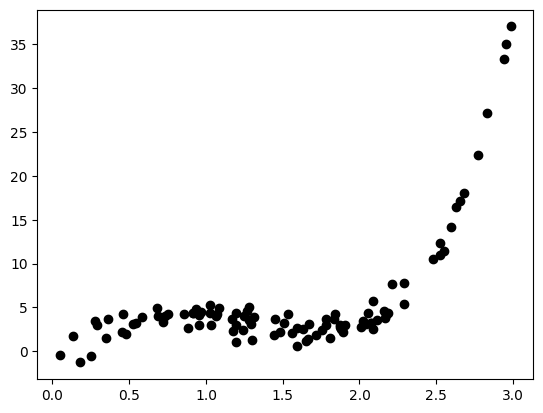

In [2]:
np.random.seed(123)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,1).rvs(len(x))
x=np.vstack(x)
plt.plot(x, y, 'ok');
plt.show()

# Przykład 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [3]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

results = []
names = []


In [4]:
seed=123
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [5]:
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -3.934800 (0.593504)
PR2: -2.892805 (0.539698)
PR3: -1.044471 (0.183796)
PR4: -0.821640 (0.207924)
PR5: -0.834403 (0.207658)
PR6: -0.829825 (0.212852)
PR25: -1.020575 (0.324837)


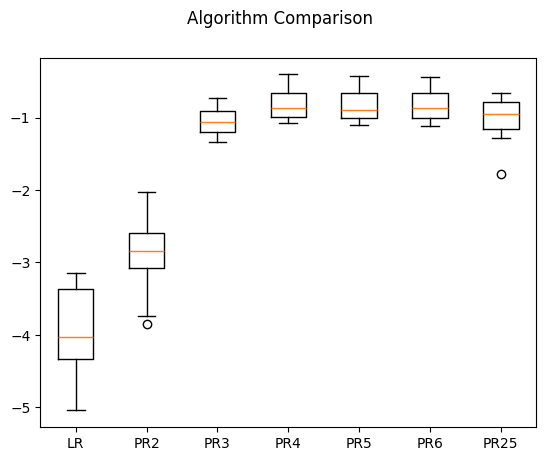

In [6]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt>. 

In [7]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomial features__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 6}

# Zadanie 
Dla danych reklamowych, obejmujących sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [8]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


LR: -1.282298 (0.164145)
P2: -0.444235 (0.075536)
P3: -0.358608 (0.083865)
P4: -0.368357 (0.083758)
P5: -0.560307 (0.450188)
P25: -6174.674499 (16982.306058)


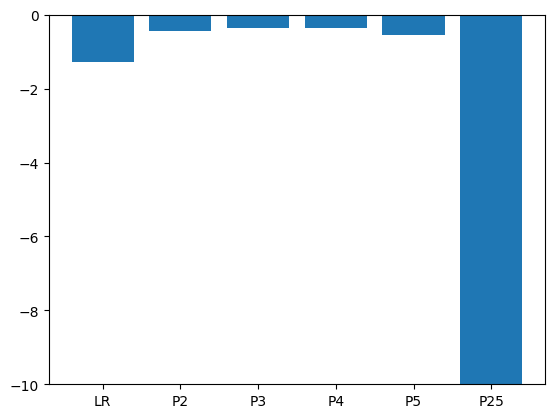

In [16]:
#my solution 
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('P2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())))
models.append(('P3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())))
models.append(('P4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())))
models.append(('P5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())))
models.append(('P25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())))
results = []
names = []
seed=123
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
scoring = 'neg_mean_absolute_error'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    names.append(name)
plt.bar(names, results)
plt.ylim(-10, 0) 
plt.show()

Stopień 1: Średnie MSE = 2.9680
Stopień 2: Średnie MSE = 0.4433
Stopień 3: Średnie MSE = 0.3280
Stopień 4: Średnie MSE = 0.3151
Stopień 5: Średnie MSE = 2.0191
Stopień 25: Średnie MSE = 5007122521.6791


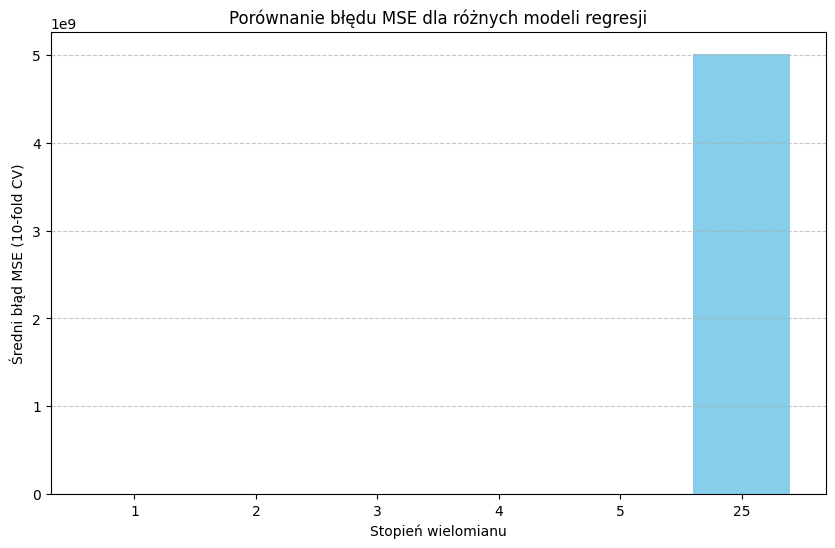

In [9]:
#chatgpt solution
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Lista stopni wielomianów
degrees = [1, 2, 3, 4, 5, 25]
mean_scores = []

# Dla każdego stopnia wielomianu wykonujemy modelowanie i cross-validation
for deg in degrees:
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), linear_model.LinearRegression())
    # Używamy neg_mean_squared_error, więc wynik trzeba odwrócić
    scores = model_selection.cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    mean_scores.append(mean_mse)
    print(f"Stopień {deg}: Średnie MSE = {mean_mse:.4f}")

# Barplot
plt.figure(figsize=(10, 6))
plt.bar([str(d) for d in degrees], mean_scores, color='skyblue')
plt.xlabel('Stopień wielomianu')
plt.ylabel('Średni błąd MSE (10-fold CV)')
plt.title('Porównanie błędu MSE dla różnych modeli regresji')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [17]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
#my solution
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7]},
                    cv=kfold,
                    refit=False)
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(X, y)
grid.best_params_

{'polynomialfeatures__degree': 4}

In [19]:
#chatgpt solution
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error
# Pipeline: PolynomialFeatures + LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linreg', linear_model.LinearRegression())
])

# Zakres stopni do przeszukania
param_grid = {
    'poly__degree': list(range(1, 26))  # stopnie od 1 do 25
}

# Scorer — ujemny błąd średniokwadratowy
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# GridSearchCV
grid = GridSearchCV(pipeline, param_grid, scoring=scorer, cv=10)
grid.fit(X, y)

# Wyniki
best_deg = grid.best_params_['poly__degree']
best_score = -grid.best_score_  # zmieniamy znak, bo było ujemne

print(f"✅ Najlepszy stopień wielomianu: {best_deg}")
print(f"📉 Średni błąd MSE (10-fold CV): {best_score:.4f}")

✅ Najlepszy stopień wielomianu: 4
📉 Średni błąd MSE (10-fold CV): 0.2658
